### Performing Hierarchical,Kmeans and DBSCAN for Airlines Data Set

### Heirarchial Clustering

In [1]:
# Importing hierarchial clustering libraries

import scipy.cluster.hierarchy as sch # for caluclating distances and creating dendrograms
from sklearn.cluster import AgglomerativeClustering # to cut the tree and form clusters
from scipy.cluster.hierarchy import linkage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read airlines dataset into a dataframe using pandas
airlinesData = pd.read_csv('EastWestAirlines1.csv')
airlinesData

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


#### Perform Initial EDA

In [3]:
##check for null values
airlinesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


###### no null values existing in the given dataset

In [4]:
##check for duplicated values
airlinesData[airlinesData.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [6]:
# removing ID# variable as it is not required for performing clustering
airlines = airlinesData.iloc[:,1:]
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# defining normalization function and standardization function
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return x
def std_func(i):
    x = (i - i.mean())/(i.std())
    return x

In [8]:
# normalizing the airlines data as clustering ishighly influenced by scale value
df_norm = norm_func(airlines)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [9]:
#creating a dendrogram using complete linkage
z=linkage(df_norm,method="complete",metric="euclidean")

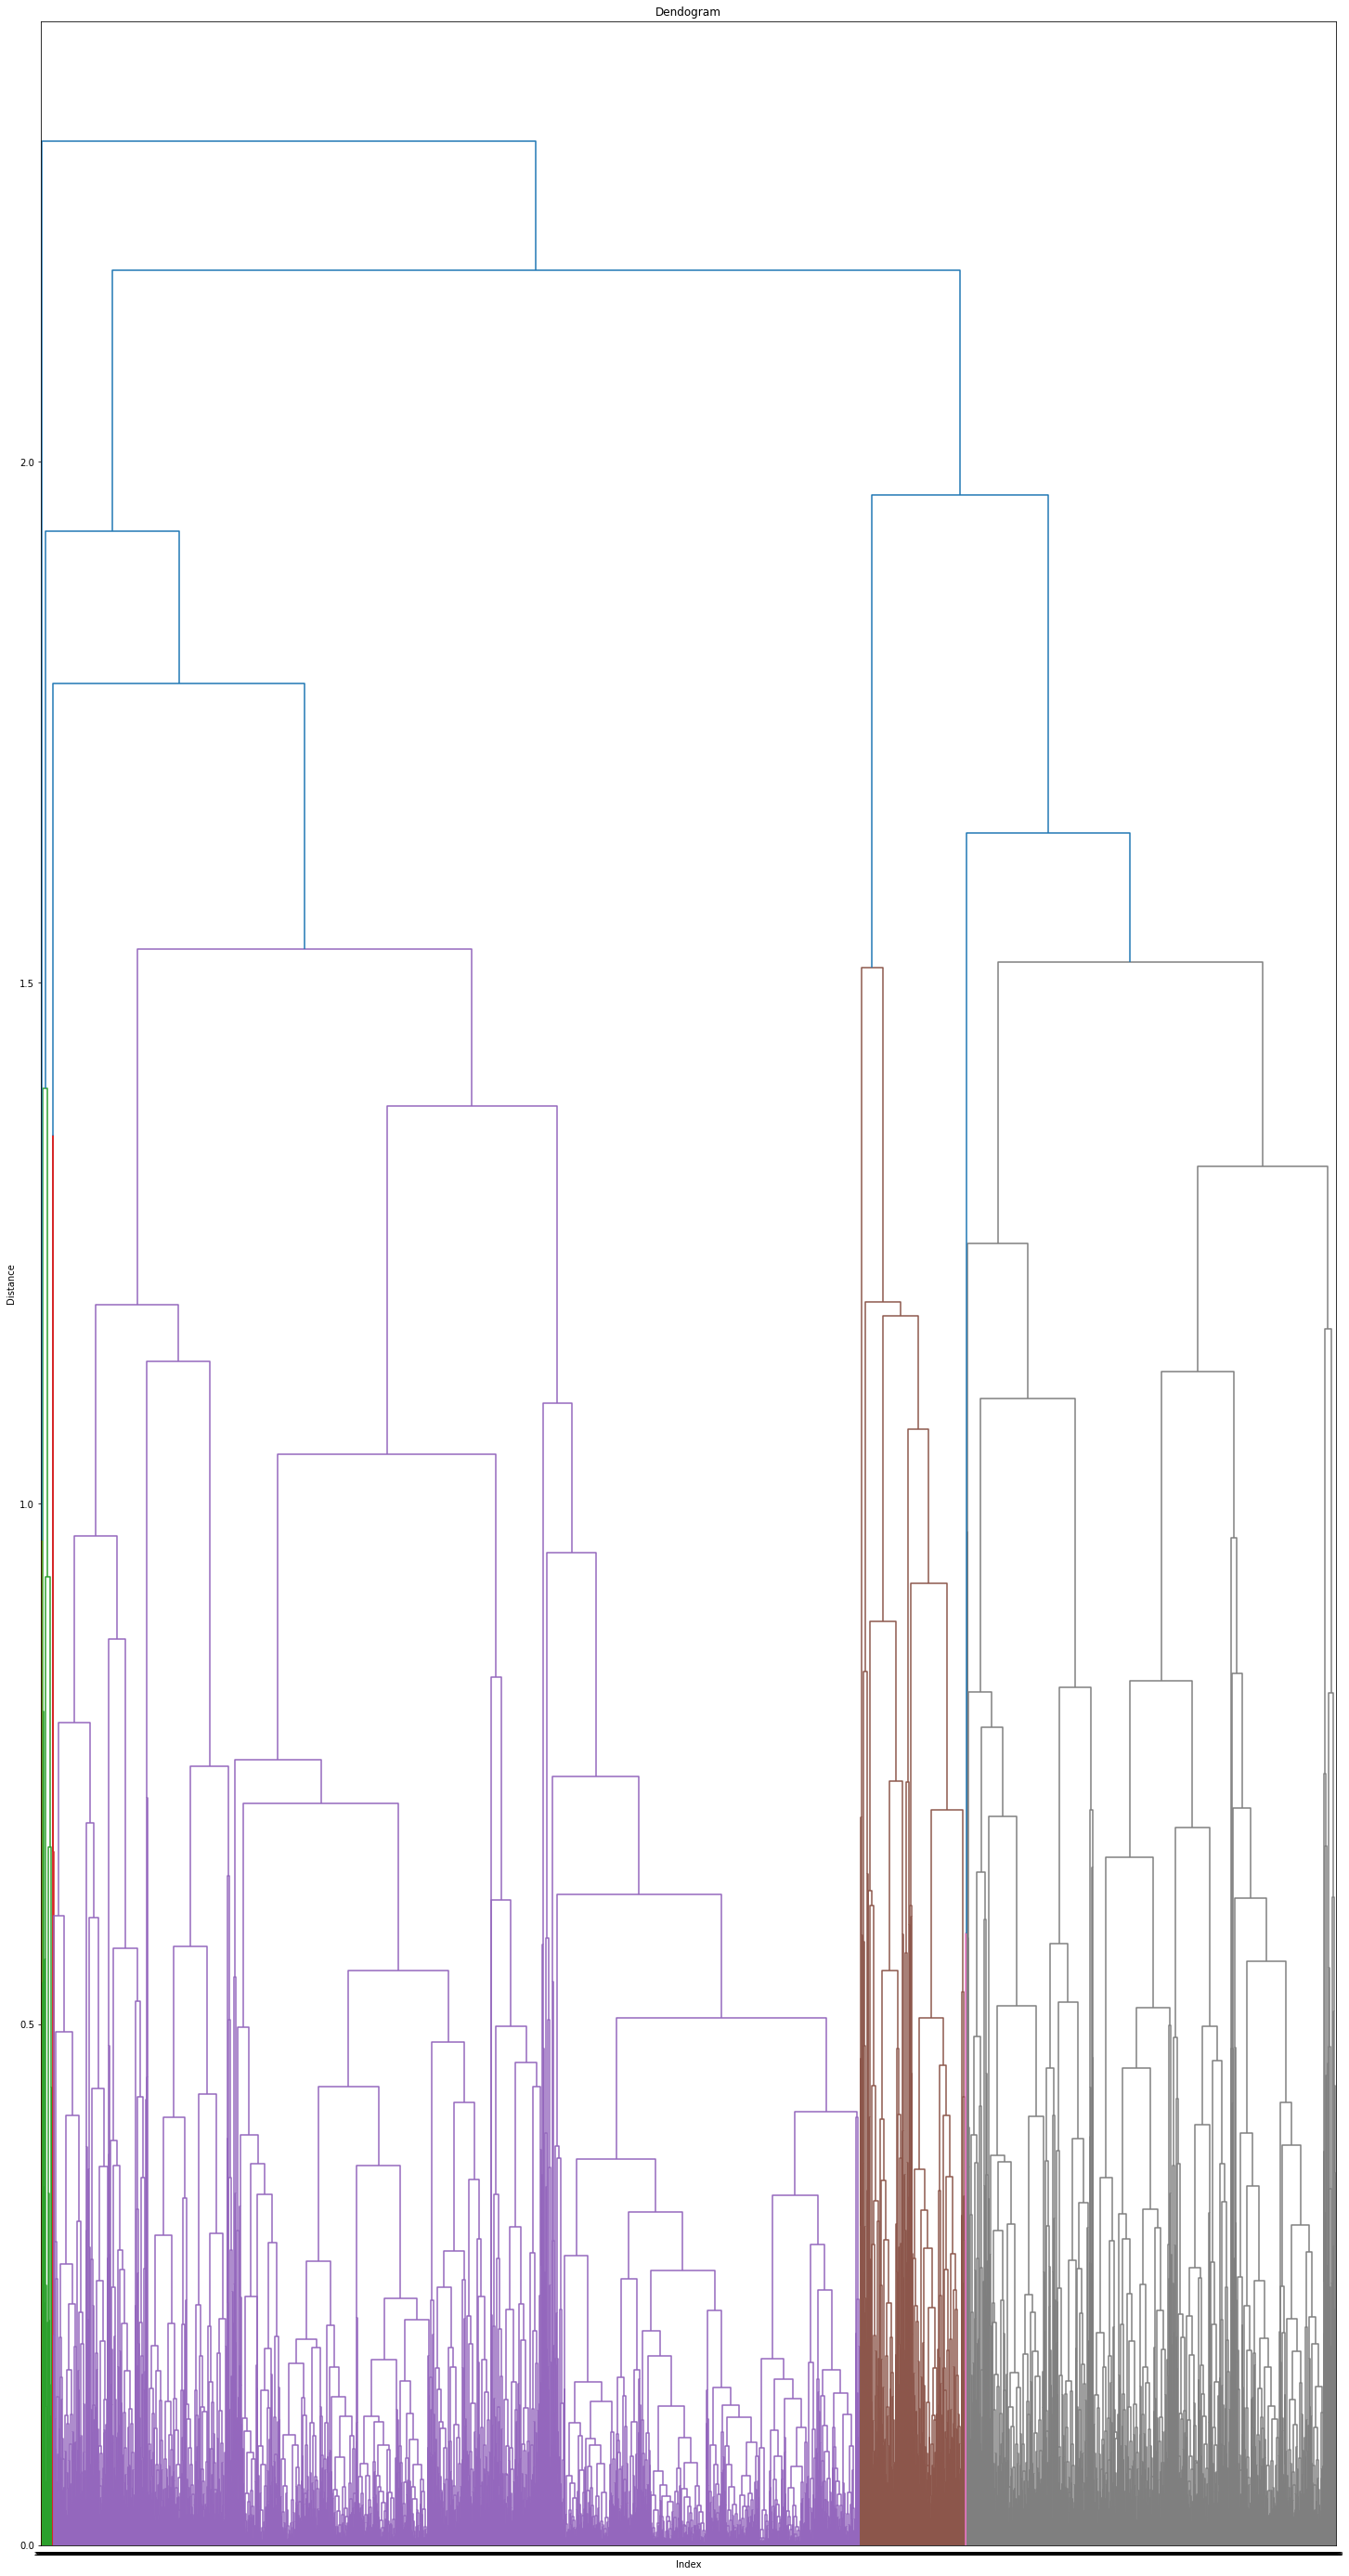

In [10]:
plt.figure(figsize=(25,50));plt.title("Dendogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=6.,
)
plt.show()

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters =5,affinity='euclidean',linkage='complete')
hc
# this is just a skelton of algorithm we havent added our data to this algo

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [12]:
# applying agglomerative clustering to crime data we use fit_predict
y_hc = hc.fit_predict(df_norm)
y_hc
# covert into dataframe
clusters = pd.DataFrame(y_hc,columns = ['Clusters'])
clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [13]:
clusters['Clusters'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: Clusters, dtype: int64

In [14]:
# adding the clusterID's to the original dataset
airlinesData['h_clusterID']=y_hc
airlinesData

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [15]:
result= airlinesData.groupby(airlinesData.h_clusterID).mean()
result

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterID,,,,,,,,,,,,
0,2169.576353,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,2302.967742,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


###### Conclusions from heirarchial clustering on airlines dataset
###### from the above formed clusters we can conclude that 
###### if Higher the no. of miles eligible to travel ,no.of miles earned with frequent flier cred card,reward card, the chances of geting the award flight is high
###### clusters 1,2,3 contains passengers with 100% award -free flight 
###### Highest proportion of customers are grouped under cluster 0:having less no. bonus miles,bonustrans,and no.miles travelled in 12 months- we can consider this customer as not active and there fore there is less chance of getting award(free flight) to them.
###### very less 4 customers are grouped under cluster 3 and they have made most of the transcations using frequent fligher credit card and having 100% chance of getting award

## KMeans

In [16]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [3]:
# read airlines dataset into a dataframe using pandas
airlinesData_1 = pd.read_csv('EastWestAirlines1.csv')
airlinesData_1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
# removing ID# variable as it is not required for performing clustering
airlines_1 = airlinesData.iloc[:,1:]
airlines_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [19]:
# normalizing the airlines dataset
df_norm = norm_func(airlines_1)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterID
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.00
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.00
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.00
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.00
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.50
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.50
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.50
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.00


In [20]:
# creating elbow curve for different k values
k = list(range(2,15))
k
TWSS= []# variable for storing total with in sum of squares distance for each kmeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    wss = []#variable for storing within sum of squares for each cluster
    for j in range(i):
        wss.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(wss))
print("TWSS VALUE",TWSS)
print("WSS VALUES",wss)

TWSS VALUE [array([1686.57052912]), array([1421.64939676]), array([1204.2189066]), array([1037.45814555]), array([972.53198401]), array([947.75419671]), array([901.5854093]), array([864.87230075]), array([810.79459063]), array([785.70036293]), array([756.5086009]), array([748.20052304]), array([726.6104888])]
WSS VALUES [array([17.16261849]), array([72.63724214]), array([29.71741012]), array([92.99062318]), array([92.75522075]), array([63.53608676]), array([26.98918759]), array([60.40127964]), array([47.58295313]), array([14.98088947]), array([45.83055076]), array([45.13799465]), array([47.98768249]), array([68.90074964])]


In [21]:
sum(cdist(df_norm.iloc[kmeans.labels_==0,:],kmeans.cluster_centers_[0].reshape(1,df_norm.shape[1]),"euclidean"))

array([17.16261849])

In [22]:
kmeans.cluster_centers_[0].reshape(1,df_norm.shape[1])

array([[ 1.41387215e-01,  5.88834259e-02,  9.45945946e-02,
         1.35135135e-02, -4.33680869e-19,  9.73477260e-02,
         3.97234444e-01,  2.88018459e-01,  4.71188169e-01,
         5.47129478e-01,  1.00000000e+00,  5.27027027e-01]])

In [23]:
# for getting cluster centers
(kmeans.cluster_centers_).shape

(14, 12)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


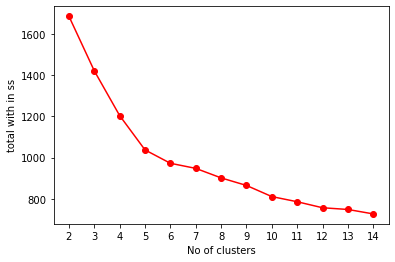

In [24]:
# ploting an elbow graph 
plt.plot(k,TWSS,'ro-');
plt.xlabel("No of clusters");
plt.ylabel("total with in ss")
plt.xticks(k)

# for plot r stands for red color
# o stands for dot and - stands for line
print(k)

#### from the above elbow curve we can consider best k value as 5
#### predefinedd no. of clusters to be formed 5

In [25]:
Kmeans_clust=KMeans(n_clusters=5)
Kmeans_clust.fit(df_norm)

KMeans(n_clusters=5)

In [34]:
airlinesData_1['clusterId']=pd.Series(Kmeans_clust.labels_)
airlinesData_1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterId
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [35]:
airlinesData_1['clusterId'].value_counts()

4    1031
1     869
3     809
0     672
2     618
Name: clusterId, dtype: int64

In [37]:
result = airlinesData_1.iloc[:,1:].groupby(airlinesData_1.clusterId).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterId
clusterId,,,,,,,,,,,,
0,83629.888393,290.885417,1.154762,1.032738,1.002976,8696.644345,10.468750,1031.645833,3.153274,4336.656250,1.0,0
1,49876.220944,89.799770,1.121979,1.020713,1.001151,3475.119678,6.919448,243.553510,0.727273,5565.805524,0.0,1
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,2
3,108203.070457,198.091471,3.913473,1.001236,1.030902,45691.933251,20.196539,712.846724,2.139679,4864.627936,1.0,3
4,33119.259942,94.223084,1.070805,1.015519,1.006790,3237.523763,6.167798,213.057226,0.604268,1990.720660,0.0,4


###### Conclusions from DBScan Clustering
###### From the above clusters we can conclude
###### The clusters formed using heirarchial and kmeans are different
###### 1.From clusters 1,4 if the Number of miles eligible for award travel(balance)is lesser the chances of getting award is less
###### 2.If frequent flyer credit card is used then the reward points per travel percentage can increased. 
###### from cluster 0,3 we can conclude that the passangers in this clusters have enrolled for frequent flier program a long back(Days_since_enroll)
###### from different parameters like cc1_miles,balance,Days_since_enroll there is a high chance for them to get free flight trip (award)
###### compared to other passengers in remaining clusters

### DBSCAN

In [38]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read airlines dataset into a dataframe using pandas
df = pd.read_csv('EastWestAirlines1.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [42]:
# removing Unnamed:0 variable as it is not required for performing clustering
df = df.iloc[:,1:]
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [44]:
array=df.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [45]:
# normalizing the data using sklearn.standard scalar
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [46]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [47]:
#Calculating the best epsilon value- to be taken for the DBSCAN model

In [48]:
#Importing required libraires for finding best epsilon
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [49]:
# Using NearestNeighbours to calculate the average distance between each point and its n minimum points neighbors.
# As no. of dimensions are11 minpoints can be taken as 2*D = 2*11 =22
neighbors = NearestNeighbors(n_neighbors=22)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

In [50]:
#Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]


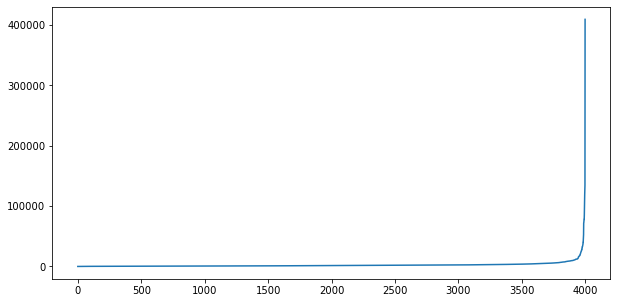

In [51]:
plt.figure(figsize=(10,5));
plt.plot(distances)



In [52]:
dbscan = DBSCAN(eps=4, min_samples=22)
dbscan.fit(X)

DBSCAN(eps=4, min_samples=22)

In [53]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])


In [55]:
cl['cluster'].value_counts()

 0    3907
-1      66
 1      26
Name: cluster, dtype: int64

In [56]:
df=pd.concat([df,cl],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [57]:
result = df.groupby(df.cluster).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,249105.454545,1058.181818,2.621212,1.484848,1.742424,63279.469697,28.227273,3993.787879,10.000000,4791.393939,0.696970
0,70778.127208,129.632455,2.056053,1.000000,1.000000,16402.772972,11.296903,401.934988,1.231636,4109.231380,0.364986
1,52331.000000,0.000000,1.153846,2.000000,1.000000,11544.653846,15.230769,223.576923,0.807692,3812.307692,0.346154


In [58]:
# from DBSCAN we can conclude that there is noise data existing in airlines data, for which balance and flight_miles_12mo very high